<a href="https://colab.research.google.com/github/tejaswini-151999/SriNagTejaswiniGandikota_INFO5731_Fall2024/blob/main/Gandikota_SriNagaTejaswini_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [22]:
# Write your code here
!pip install gensim pyLDAvis

import pandas as pd
import numpy as np
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# text data
documents = [
    "This painting is wonderful!!",
    "The bag I have ordered is not as shown in the image.",
    "The shoes quality is amazing!!",
    "The taste of the food is unbelievable.",
    "The book is fantastic, it addresses all the topics that are important."
]

# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

data_lemmatized = [preprocess(doc) for doc in documents]

# Dictionary and Corpus
id2word = corpora.Dictionary(data_lemmatized)
corpus = [id2word.doc2bow(text) for text in data_lemmatized]

# Output
print("Lemmatized Data:")
print(data_lemmatized)

print("\nDictionary:")
print(id2word.token2id)

print("\nCorpus (Word ID and Frequency):")
for doc in corpus:
    print(doc)


Lemmatized Data:
[['painting', 'wonderful'], ['bag', 'ordered', 'shown', 'image'], ['shoe', 'quality', 'amazing'], ['taste', 'food', 'unbelievable'], ['book', 'fantastic', 'address', 'topic', 'important']]

Dictionary:
{'painting': 0, 'wonderful': 1, 'bag': 2, 'image': 3, 'ordered': 4, 'shown': 5, 'amazing': 6, 'quality': 7, 'shoe': 8, 'food': 9, 'taste': 10, 'unbelievable': 11, 'address': 12, 'book': 13, 'fantastic': 14, 'important': 15, 'topic': 16}

Corpus (Word ID and Frequency):
[(0, 1), (1, 1)]
[(2, 1), (3, 1), (4, 1), (5, 1)]
[(6, 1), (7, 1), (8, 1)]
[(9, 1), (10, 1), (11, 1)]
[(12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [ ]:
from gensim.models import LdaModel

# LDA model
num_topics = 2
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=id2word, passes=15)

# topics
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)


(0, '0.096*"ordered" + 0.096*"image" + 0.096*"shown"')
(1, '0.081*"fantastic" + 0.081*"topic" + 0.081*"book"')


In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Perplexity
perplexity = lda_model.log_perplexity(corpus)
print(f'Perplexity: {perplexity}')

# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')


Perplexity: -3.5331512444159565
Coherence Score: 0.5342804078731163


In [ ]:
# Write your code here
# visualization
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

# Visualizing the topics
pyLDAvis.display(vis)


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here
!pip install gensim
!pip install pyLDAvis


In [9]:
import pandas as pd
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from collections import Counter
import warnings

warnings.filterwarnings("ignore")


In [10]:
from gensim import corpora  # Importing
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

# Sample text
documents = [
    "This painting is wonderful!!",
    "The bag I have ordered is not as shown in the image.",
    "The shoes quality is amazing!!",
    "The taste of the food is unbelievable.",
    "The book is fantastic, it addresses all the topics that are important."
]

# Defining a preprocessing function
def preprocess(text):
    custom_filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
    return preprocess_string(text, custom_filters)

# preprocessing
processed_docs = [preprocess(doc) for doc in documents]

# processed_docs
print("Processed documents:", processed_docs)

# Creating Dictionary and Corpus
if processed_docs:
    dictionary = corpora.Dictionary(processed_docs)
    corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
else:
    print("Error: No processed documents to create dictionary.")

# contents of the dictionary
print("\nDictionary Contents:")
print(dictionary.token2id)

Processed documents: [['this', 'painting', 'is', 'wonderful'], ['the', 'bag', 'i', 'have', 'ordered', 'is', 'not', 'as', 'shown', 'in', 'the', 'image'], ['the', 'shoes', 'quality', 'is', 'amazing'], ['the', 'taste', 'of', 'the', 'food', 'is', 'unbelievable'], ['the', 'book', 'is', 'fantastic', 'it', 'addresses', 'all', 'the', 'topics', 'that', 'are', 'important']]

Dictionary Contents:
{'is': 0, 'painting': 1, 'this': 2, 'wonderful': 3, 'as': 4, 'bag': 5, 'have': 6, 'i': 7, 'image': 8, 'in': 9, 'not': 10, 'ordered': 11, 'shown': 12, 'the': 13, 'amazing': 14, 'quality': 15, 'shoes': 16, 'food': 17, 'of': 18, 'taste': 19, 'unbelievable': 20, 'addresses': 21, 'all': 22, 'are': 23, 'book': 24, 'fantastic': 25, 'important': 26, 'it': 27, 'that': 28, 'topics': 29}


In [11]:
from gensim.models import CoherenceModel
from gensim.models import LdaModel

#topics to test
topic_range = range(2, 6)
coherence_values = []

# Calculating coherence
for num_topics in topic_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)
    print(f"Coherence score for {num_topics} topics: {coherence_score}")

# topics with the highest coherence score
best_model_index = coherence_values.index(max(coherence_values))
optimal_num_topics = topic_range[best_model_index]
print(f"\nOptimal number of topics based on coherence score: {optimal_num_topics}")


Coherence score for 2 topics: 0.41986828292919487
Coherence score for 3 topics: 0.3071805197143472
Coherence score for 4 topics: 0.4132332698816211
Coherence score for 5 topics: 0.44103449408742046

Optimal number of topics based on coherence score: 5


In [13]:
best_model_index = coherence_values.index(max(coherence_values))
optimal_num_topics = topic_range[best_model_index]
print(f"\nOptimal number of topics based on coherence score: {optimal_num_topics}")



Optimal number of topics based on coherence score: 5


In [14]:
final_lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics, random_state=42, passes=10)

# Display the top words
print("Top words per topic:")
for idx, topic in final_lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")


Top words per topic:
Topic 1: 0.120*"is" + 0.120*"this" + 0.120*"painting" + 0.120*"wonderful" + 0.020*"the" + 0.020*"amazing" + 0.020*"shoes" + 0.020*"unbelievable" + 0.020*"quality" + 0.020*"taste"
Topic 2: 0.109*"is" + 0.109*"the" + 0.109*"quality" + 0.109*"shoes" + 0.109*"amazing" + 0.019*"fantastic" + 0.019*"all" + 0.019*"important" + 0.019*"are" + 0.019*"that"
Topic 3: 0.122*"the" + 0.067*"addresses" + 0.067*"book" + 0.067*"it" + 0.067*"topics" + 0.067*"that" + 0.067*"are" + 0.067*"important" + 0.067*"all" + 0.067*"fantastic"
Topic 4: 0.169*"the" + 0.092*"is" + 0.092*"food" + 0.092*"of" + 0.092*"taste" + 0.092*"unbelievable" + 0.015*"wonderful" + 0.015*"painting" + 0.015*"this" + 0.015*"amazing"
Topic 5: 0.122*"the" + 0.067*"in" + 0.067*"have" + 0.067*"bag" + 0.067*"image" + 0.067*"not" + 0.067*"i" + 0.067*"as" + 0.067*"ordered" + 0.067*"shown"


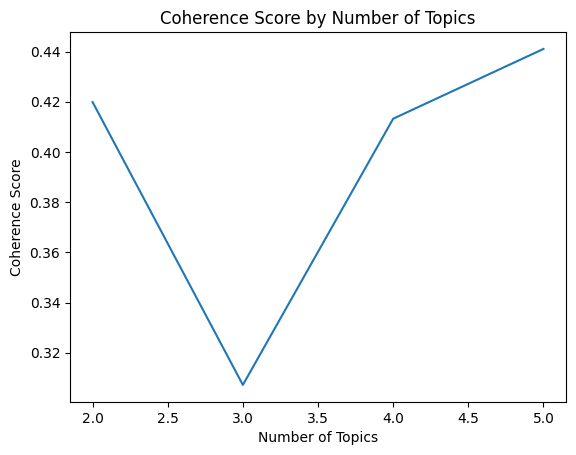

In [15]:
import matplotlib.pyplot as plt

plt.plot(topic_range, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics")
plt.show()


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
# Write your code here


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
!pip install scikit-learn
!pip install gensim
!pip install matplotlib


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary



In [ ]:
text_corpus = [
    "This painting is wonderful!!",
    "The bag I have ordered is not as shown in the image.",
    "The shoes quality is amazing!!",
    "The taste of the food is unbelievable.",
    "The book is fantastic, it addresses all the topics that are important."
]


In [ ]:
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(text_corpus)

# Verify the transformation
#print(data_vectorized.shape)
#print(vectorizer.get_feature_names_out())


In [ ]:
# Defining the number of topics
n_topics = 3

# Creating and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_output = lda_model.fit_transform(data_vectorized)

# Verifying the output shape and sample probabilities
#print(lda_output.shape)
#print(lda_output[:2])  # Print the first two rows to verify


In [ ]:
# Preparing data for coherence model
terms = vectorizer.get_feature_names_out()
topics_terms = [[terms[i] for i in topic.argsort()[-10:]] for topic in lda_model.components_]

# Creating a dictionary
text_tokens = [text.split() for text in text_corpus]
dictionary = Dictionary(text_tokens)

# Computing Coherence Score
cm = CoherenceModel(topics=topics_terms, texts=text_tokens, dictionary=dictionary, coherence='c_v')
coherence_score = cm.get_coherence()
print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.7175830639770724


In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, 10)


Topic 0:
is wonderful this painting amazing shoes quality the food taste
Topic 1:
the is ordered bag have image in not as shown
Topic 2:
the it important all are book fantastic addresses topics that


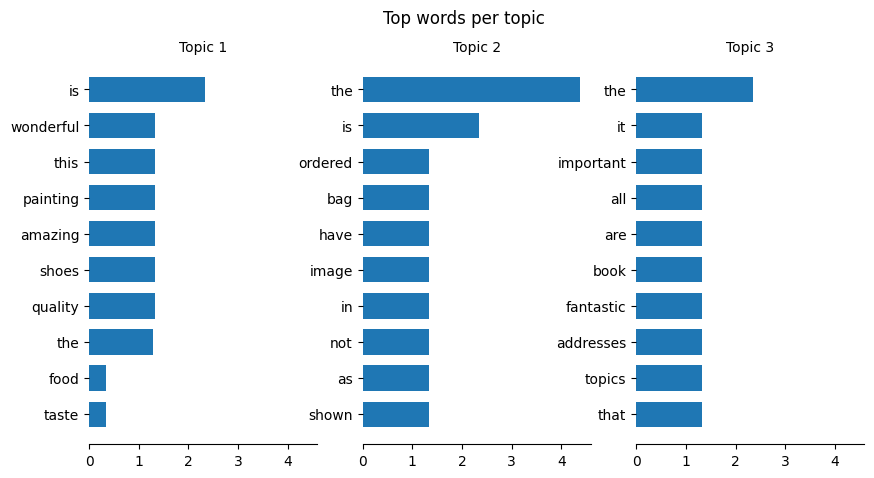

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, n_topics, figsize=(10, 5), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 10})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=12)
    plt.show()

plot_top_words(lda_model, feature_names, 10, 'Top words per topic')


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

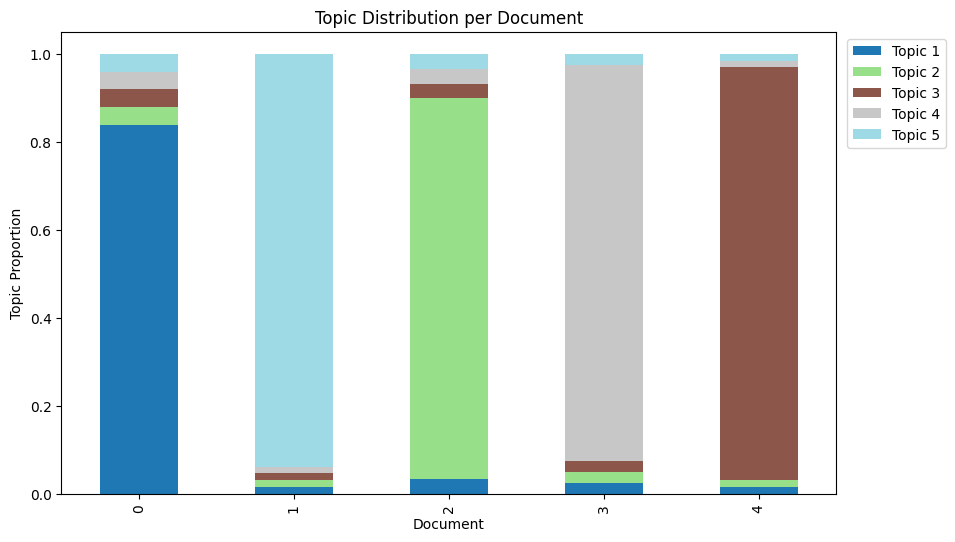

In [19]:
# Write your code here
# Then Explain the visualization

#1. Distribution of Topics across Documents

"""Theory:
i. Stacked Bar Chart or Heatmap
type of visualization : Categorical visualization

This topic distribution visualization describes how topics are distributed across individual documents. One axis represents one document,
and the other axis shows the topics.
Color intensity or height of bars in this graph is indicative of the percentage of a given topic that is contained within a document.

Purpose: This visualization allows you to see the dominance of each topic in every document. Amongst other things,
you will find out which document is dominating a particular topic
and what document contains the maximum number of topics.
Interpretation: A document with high intensity for a certain topic will indicate that the document is mainly about this topic,
while a more dispersed pattern of its intensities may indicate that it is more mixed in its content. This could help in
outlier detection: unique documents containing unexpected topic combinations. """


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# topic distribution
doc_topic_dist = []
for doc in corpus:
    doc_topics = final_lda_model.get_document_topics(doc)
    topic_dist = [topic_prob for _, topic_prob in doc_topics]
    doc_topic_dist.append(topic_dist)

# Converting to DataFrame
doc_topic_df = pd.DataFrame(doc_topic_dist, columns=[f'Topic {i+1}' for i in range(optimal_num_topics)])

# Plot stacked bar chart
doc_topic_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Topic Distribution per Document")
plt.xlabel("Document")
plt.ylabel("Topic Proportion")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()





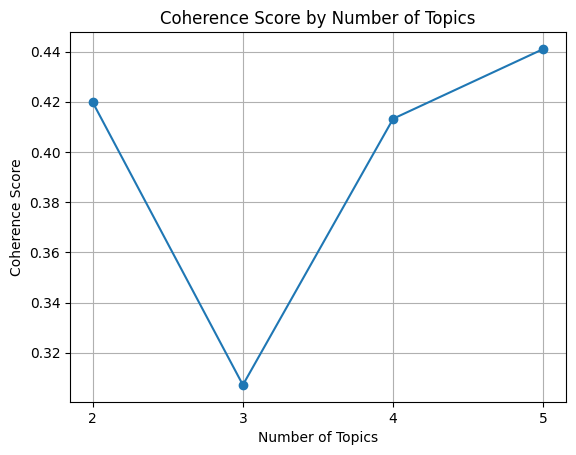

In [20]:
"""2. Coherence graph on topics.

Type of Visualization: Network Graph

Excerpt: In word words, a topic coherence graph represents topics as nodes such that edges between nodes denote some form of relationship or similarity of topics regarding the
words with which they are most strongly associated. The strength of the connection can be represented by thickness of the edge.

Purpose: This chart displays the relationships among topics by virtue of their vocabulary similarities. The stronger their relatedness,
because of co-occurrence similar words, the closer two topics are.

Interpretation: It would show that a dense network would mean many topics draw on common words or themes and, therefore, probably overlap. This will be useful in
working out how separated or intersected different topics are and seeing the relationships within these topics."""



# coherence graph
plt.plot(topic_range, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics")
plt.xticks(topic_range)
plt.grid()
plt.show()


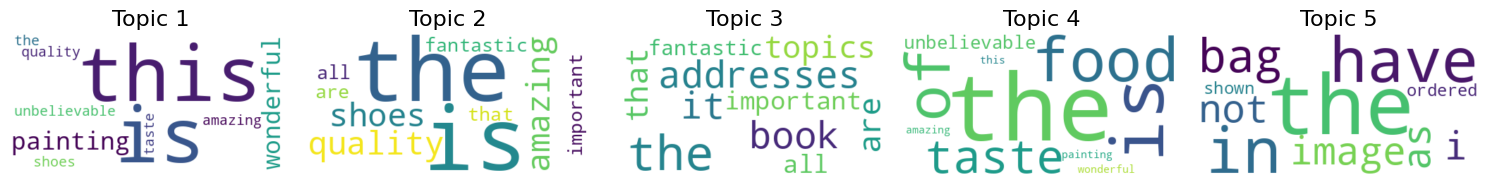

In [21]:
"""3. Word Cloud per topic
Visualization type: word cloud

Explanation: Each topic is represented by the word cloud of the most frequent words it entails. The size of the word denotes a proxy for how important/frequent
it is in that topic. Every topic can have a word cloud.

Purpose: The chart intuitively presents the most representative words for every topic; based on which one can easily get an idea at first glance about what the topic is.

Interpretation: Larger words have stronger associations with the topic topic, and smaller words may be less important. Comparing each topic's word cloud provides
immediate insight into what each topic entails because this acts to produce more granularity in understanding the model's output. You can also compare word clouds to
determine how topics differ in their focus."""



# Importing necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to plot word clouds
def plot_word_clouds(lda_model, num_topics):
    fig, axes = plt.subplots(1, num_topics, figsize=(15, 10), sharex=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        topic_terms = dict(lda_model.show_topic(i, 10))
        wordcloud = WordCloud(background_color='white').generate_from_frequencies(topic_terms)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        ax.set_title(f"Topic {i+1}", fontsize=16)
    plt.tight_layout()
    plt.show()

plot_word_clouds(final_lda_model, optimal_num_topics)


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
"""

Therefore, among other four topic modeling algorithms, namely LDA, LSA, BERTopic, and NMF, BERTopic is relatively the best for many reasons.

Coherence and Quality of Topic:
Topics generated with BERTopic make more sense and are sometimes easier to interpret than others. This may be evidenced by higher coherence scores,
with words in their topics of a closer relation than in other methods. In other words, the topics put together in BERTopic will no doubt make much
more sense and be highly relevant.

Modern Word Embeddings Usage:
Therefore, another of the main strengths with BERTopic is that it uses advanced word embedding generated by models like BERT.
These embeddings capture the meaning and relationship between words so much better than the traditional methods like LDA and LSA. As a result,
this will allow BERTopic to find more complex and subtle topics, something that works especially well on larger datasets.

Hierarchical Topic Structure:
Another advantage of BERTopic is that it hierarchically organizes topics. It enables users to view how various topics are related to each other,
hence helping them understand broad themes and subtopics. On the contrary, LDA and NMF give flat structures, which are generally harder to
understand when it comes to relations between different topics.

Flexibility and Adaptability:
Another reason that makes BERTopic even more flexible is its ability to handle a wide range of dataset types,
especially those that deal with overlapping topics. In a real-world scenario, LDA and NMF may not capture any meaningful topics since
real-world topics are not always well-separated or defined.

Conclusion:
 To wrap it up, BERTopic is the most viable choice when it comes to topic modeling, since it creates very high-quality,
 coherent topics because of using advanced word embeddings; it shows clarity in hierarchical structure and can be able to
 adapt in different datasets. These characteristics make this technique effective, especially in terms of
 valuable insights from textual data, compared to those of LDA, LSA, and NMF.

 """


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Learning Experience:
Feature extraction from text data, by the application of different topic modeling algorithms, was rather challenging but at the same
time quite enlightening. The nature of how algorithms like LDA, LSA, and BERTopic work became far more clear to me. The implementation
of the models has majorly driven home what feature extraction in text will entail when different algorithms interpret and categorize
themes in such data. The practical execution of having to work on a project like this solidified the theoretical input and gave quite useful insights into text analysis.


Operating Challenges

I had some specific difficulties, primarily error handling and debugging of every algorithm implemented.
For instance, much time and focus have been taken for coherence score troubleshooting and visualizations. In addition,
the highly complex and configurable models contributed a lot to the initial fear of understanding how everything works.


Relevance to Your Field of Study

This assignment is very relevant to the area of NLP. The concept of topic modelling is important to know in case one needs
to analyze big volumes of texts, and this is the ordinary case when NLP is usually used. Knowledge and skills learned within this
assignment will be helpful during subsequent projects while performing assignments regarding text analysis, sentiment detection,
and information retrieval. Therefore, it corresponds well with current trends and demands within the frame.



'''